# Mise en pratique de la méthode de Viola et Jones

### Importation des librairies et chargement des modèles pré-entrainés.

In [1]:
import cv2
import time
import matplotlib.pyplot as plt
import numpy as np

# Choix des polices d'écriture à partir de ce que propose OpenCV
font = cv2.FONT_HERSHEY_SCRIPT_SIMPLEX
font_warning = cv2.FONT_HERSHEY_TRIPLEX

#Chemin d'accès aux classifieurs pre-entrainés.

cascPath = 'haarcascades/haarcascade_frontalface_default.xml'

#Création de l'objet correspondant à chaque classifieurs

faceCascade = cv2.CascadeClassifier(cascPath)

## Détection de visages sur photo

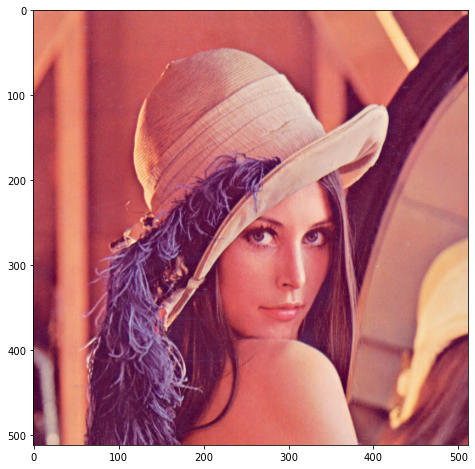

In [3]:
lena = cv2.imread('images/lena_color.tif')
plt.figure(figsize=(12,8))
plt.imshow(cv2.cvtColor(lena, cv2.COLOR_BGR2RGB))
plt.show()

### Détection des visages sur l'image à l'aide de l'implémentation de la méthode par Open CV.

In [4]:
faces = faceCascade.detectMultiScale(lena,scaleFactor=1.1,minNeighbors=1,flags=cv2.CASCADE_SCALE_IMAGE)

#### scale factor : facteur multiplicatif de la fenêtre de recherche qui détecte les visages
#### minNeighbors : En cas de detection multiple d'un même visage, il faut minNeighors détections pour que la détection soit comptabilisée.

### Dessin des rectangles autour de chaque visage précédemment détectés. 

In [5]:
for (x, y, w, h) in faces: 
    # Dessine un rectangle autour du visage
    cv2.rectangle(lena, (x, y), (x+w, y+h), (255, 255, 255), 3)

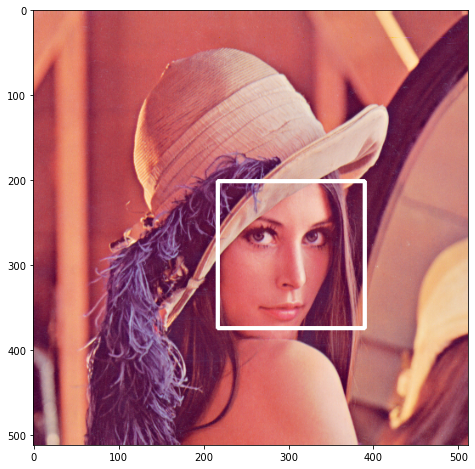

In [6]:
plt.figure(figsize=(12,8))
plt.imshow(cv2.cvtColor(lena, cv2.COLOR_BGR2RGB))
plt.show()

### Ajout d'un filtre type snapchat oreilles de chien au dessus du visage

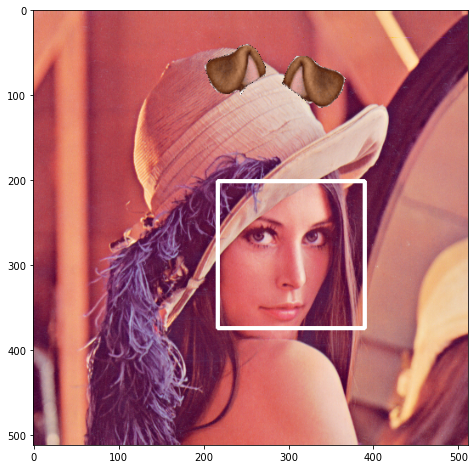

In [7]:
dog = cv2.imread('images/dog.png', 1) 
img=np.copy(lena)

for (x, y, w, h) in faces:
    
    # Calcul du ratio des dimensions des oreilles pour le conserver
    ratio=dog.shape[0]/dog.shape[1]
    # Mise à l'echelle des oreilles au visage
    dog = cv2.resize(dog,(w,int(w*ratio)))
    
    # Copie de chaque pixel des oreilles sur l'image
    for i in range(x-dog.shape[0],x):
        for j in range(y,y+dog.shape[1]):
            if (dog[i-x+dog.shape[0]][j-y].all()!=0):
                img[i][j]=dog[i-x+dog.shape[0]][j-y]
                
plt.figure(figsize=(12,8))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

## Détection de visages en temps réel sur vidéo

### Sur une vidéo pré-enregistrée

In [11]:
video_capture = cv2.VideoCapture('titanic.mp4')

In [12]:
while True:
    # Même principe que pour une photo, mais pour une succession d'images 
    ret, frame = video_capture.read()
    
    # On procède à la détection sur une image en nuance de gris, afin de diminuer le temps de calcul. 
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = faceCascade.detectMultiScale(gray,scaleFactor=1.3,minNeighbors=2,minSize=(200, 200),flags=cv2.CASCADE_SCALE_IMAGE)

    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 3)
   

    cv2.putText(frame,'Visage(s) detecte(s) : ' + str(len(faces)),(40, 40), font, 1,(253,63,146),2)     
   
    # Affichage de l'image en cours, après traitement.
    cv2.imshow('Video', frame)
    time.sleep(0.02)
    if cv2.waitKey(1) & 0xFF == ord('q'):
      break

video_capture.release()
cv2.destroyAllWindows()

### Par webcam avec ajout de filtre

In [55]:
video_capture = cv2.VideoCapture(0)

In [56]:
while True:
    # Même principe que pour une photo, mais pour une succession d'images 
    ret, frame = video_capture.read()
    
    # On procède à la détection sur une image en nuance de gris, afin de diminuer le temps de calcul. 
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = faceCascade.detectMultiScale(gray,scaleFactor=1.3,minNeighbors=2,minSize=(200, 200),flags=cv2.CASCADE_SCALE_IMAGE)

    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 3)
        
        # Copie des oreilles de la même façon que précédemment
        ratio=dog.shape[0]/dog.shape[1]
        dog = cv2.resize(dog,(w,int(w*ratio)))
        for i in range(x-dog.shape[0],x):
            for j in range(y,y+dog.shape[1]):
                if (dog[i-x+dog.shape[0]][j-y].all()!=0):
                    frame[i][j]=dog[i-x+dog.shape[0]][j-y]

    cv2.putText(frame,'Visage(s) detecte(s) : ' + str(len(faces)),(40, 40), font, 1,(253,63,146),2)      
    # Affichage de l'image en cours, après traitement.
    cv2.imshow('Video', frame)
    time.sleep(0.02)
    if cv2.waitKey(1) & 0xFF == ord('q'):
      break

video_capture.release()
cv2.destroyAllWindows()

### Par webcam avec detection du non-respect de la distanciation

In [27]:
video_capture = cv2.VideoCapture(0)

In [28]:
while True:
    # Même principe que pour une photo, mais pour une succession d'images 
    ret, frame = video_capture.read()
    
    # On procède à la détection sur une image en nuance de gris, afin de diminuer le temps de calcul. 
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = faceCascade.detectMultiScale(gray,scaleFactor=1.3,minNeighbors=2,minSize=(200, 200),flags=cv2.CASCADE_SCALE_IMAGE)

    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 3)

    cv2.putText(frame,'Visage(s) detecte(s) : ' + str(len(faces)),(40, 40), font, 1,(255,255,255),2)    
    
    # Affichage du warning si plusieurs visages sont détectés
    if (len(faces)>1):
        cv2.putText(frame,'Veuillez mettre votre masque !',(40, 80), font_warning, 1,(22,35,217),2)  
        
    # Affichage de l'image en cours, après traitement.
    cv2.imshow('Video', frame)
    time.sleep(0.02)
    if cv2.waitKey(1) & 0xFF == ord('q'):
      break

video_capture.release()
cv2.destroyAllWindows()